In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### data read test

In [5]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime

start = datetime.datetime(year=2020, month=1, day=1)
#end = start + datetime.timedelta(days=30)
end = datetime.datetime.now()

start_date = f'{start.year}/{start.month}/{start.day}'
end_date = f'{end.year}/{end.month}/{end.day}'

print(start_date)
print(end_date)

2020/1/1
2023/5/2


In [6]:
df = pd.DataFrame([])
names = ['NIKKEI225', 'DJIA', 'NASDAQ100']
for name in names:
    df_tmp = pdr.DataReader(name, 'fred', start_date, end_date)
    df = pd.merge(df, df_tmp, how='outer', left_index=True, right_index=True)

df = df.reset_index()
df

,DATE,NIKKEI225,DJIA,NASDAQ100
0,2020-01-01,NaN,NaN,NaN
1,2020-01-02,NaN,28868.80,8872.219
2,2020-01-03,NaN,28634.88,8793.902
3,2020-01-06,23204.86,28703.38,8848.516
4,2020-01-07,23575.72,28583.68,8846.449
...,...,...,...,...
865,2023-04-26,28416.47,33301.87,12806.480
866,2023-04-27,28457.68,33826.16,13160.030
867,2023-04-28,28856.44,34098.16,13245.990
868,2023-05-01,29123.18,34051.70,13231.470


In [7]:
for name in names:
    if sum(df[name].isnull()) > 0:
        shift_name = f'{name}_shift1'
        df[shift_name] = df[name].shift(1)
        df[name] = df[name].where(~df[name].isnull(), df[shift_name])
        del df[shift_name]

df = df.dropna()
df

,DATE,NIKKEI225,DJIA,NASDAQ100
3,2020-01-06,23204.86,28703.38,8848.516
4,2020-01-07,23575.72,28583.68,8846.449
5,2020-01-08,23204.76,28745.09,8912.371
6,2020-01-09,23739.87,28956.90,8989.629
7,2020-01-10,23850.57,28823.77,8966.637
...,...,...,...,...
865,2023-04-26,28416.47,33301.87,12806.480
866,2023-04-27,28457.68,33826.16,13160.030
867,2023-04-28,28856.44,34098.16,13245.990
868,2023-05-01,29123.18,34051.70,13231.470


In [8]:
df_nikkei = df[['DATE', 'NIKKEI225']].copy()
df_nikkei.columns = ['ds', 'y']
df_nikkei

,ds,y
3,2020-01-06,23204.86
4,2020-01-07,23575.72
5,2020-01-08,23204.76
6,2020-01-09,23739.87
7,2020-01-10,23850.57
...,...,...
865,2023-04-26,28416.47
866,2023-04-27,28457.68
867,2023-04-28,28856.44
868,2023-05-01,29123.18


### prophet test

In [9]:
from prophet import Prophet

m = Prophet()
m.fit(df_nikkei)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

22:50:34 - cmdstanpy - INFO - Chain [1] start processing
22:50:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-06,24746.691577,23699.882015,25391.395237,24746.691577,24746.691577,-215.287118,-215.287118,-215.287118,326.000821,326.000821,326.000821,-541.287938,-541.287938,-541.287938,0.0,0.0,0.0,24531.404459
1,2020-01-07,24681.470546,23727.550586,25321.537149,24681.470546,24681.470546,-151.365476,-151.365476,-151.365476,384.282100,384.282100,384.282100,-535.647576,-535.647576,-535.647576,0.0,0.0,0.0,24530.105070
2,2020-01-08,24616.249516,23597.672422,25240.252763,24616.249516,24616.249516,-177.222537,-177.222537,-177.222537,355.099258,355.099258,355.099258,-532.321795,-532.321795,-532.321795,0.0,0.0,0.0,24439.026979
3,2020-01-09,24551.028485,23551.310883,25191.164389,24551.028485,24551.028485,-190.328525,-190.328525,-190.328525,341.260375,341.260375,341.260375,-531.588901,-531.588901,-531.588901,0.0,0.0,0.0,24360.699960
4,2020-01-10,24485.807455,23425.543479,25139.053255,24485.807455,24485.807455,-193.440150,-193.440150,-193.440150,340.170685,340.170685,340.170685,-533.610835,-533.610835,-533.610835,0.0,0.0,0.0,24292.367305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2024-04-27,30391.152551,19054.138969,39037.592834,20143.966683,40078.981601,-1125.392883,-1125.392883,-1125.392883,-873.406815,-873.406815,-873.406815,-251.986067,-251.986067,-251.986067,0.0,0.0,0.0,29265.759669
1216,2024-04-28,30397.395382,18643.460260,38954.664623,20114.804603,40137.614701,-1144.370063,-1144.370063,-1144.370063,-873.406424,-873.406424,-873.406424,-270.963639,-270.963639,-270.963639,0.0,0.0,0.0,29253.025319
1217,2024-04-29,30403.638213,20097.800759,40269.701416,20086.968877,40191.718067,34.319107,34.319107,34.319107,326.000821,326.000821,326.000821,-291.681714,-291.681714,-291.681714,0.0,0.0,0.0,30437.957320
1218,2024-04-30,30409.881044,20169.030471,40259.942765,20058.063409,40231.078215,70.492584,70.492584,70.492584,384.282100,384.282100,384.282100,-313.789516,-313.789516,-313.789516,0.0,0.0,0.0,30480.373628


In [10]:
df.loc[:,'ratio']= df.loc[:,'NIKKEI225']/df['NIKKEI225'].iloc[0]
df

,DATE,NIKKEI225,DJIA,NASDAQ100,ratio
3,2020-01-06,23204.86,28703.38,8848.516,1.000000
4,2020-01-07,23575.72,28583.68,8846.449,1.015982
5,2020-01-08,23204.76,28745.09,8912.371,0.999996
6,2020-01-09,23739.87,28956.90,8989.629,1.023056
7,2020-01-10,23850.57,28823.77,8966.637,1.027826
...,...,...,...,...,...
865,2023-04-26,28416.47,33301.87,12806.480,1.224591
866,2023-04-27,28457.68,33826.16,13160.030,1.226367
867,2023-04-28,28856.44,34098.16,13245.990,1.243552
868,2023-05-01,29123.18,34051.70,13231.470,1.255047


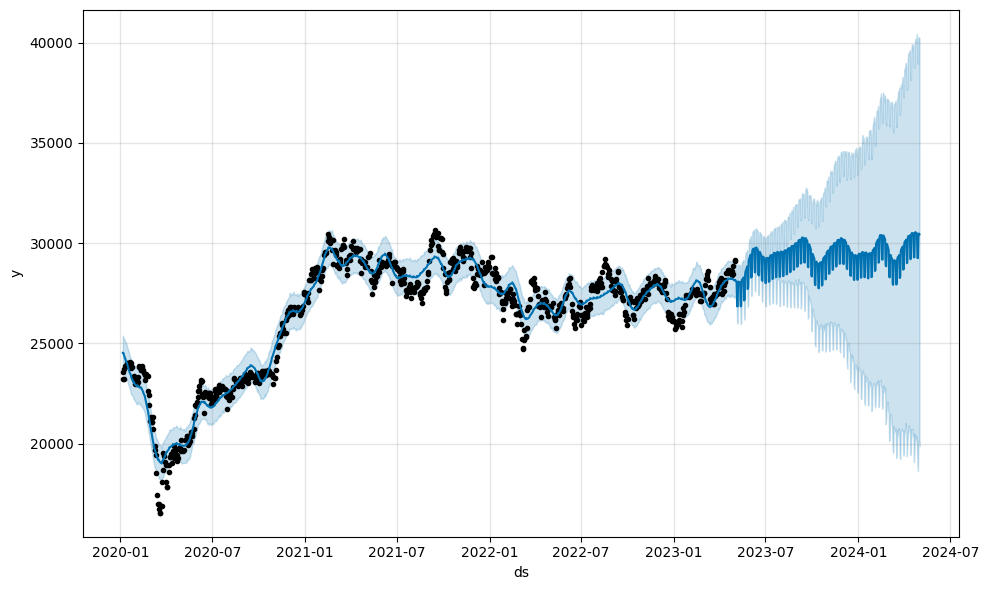

In [11]:
fig1 = m.plot(forecast)

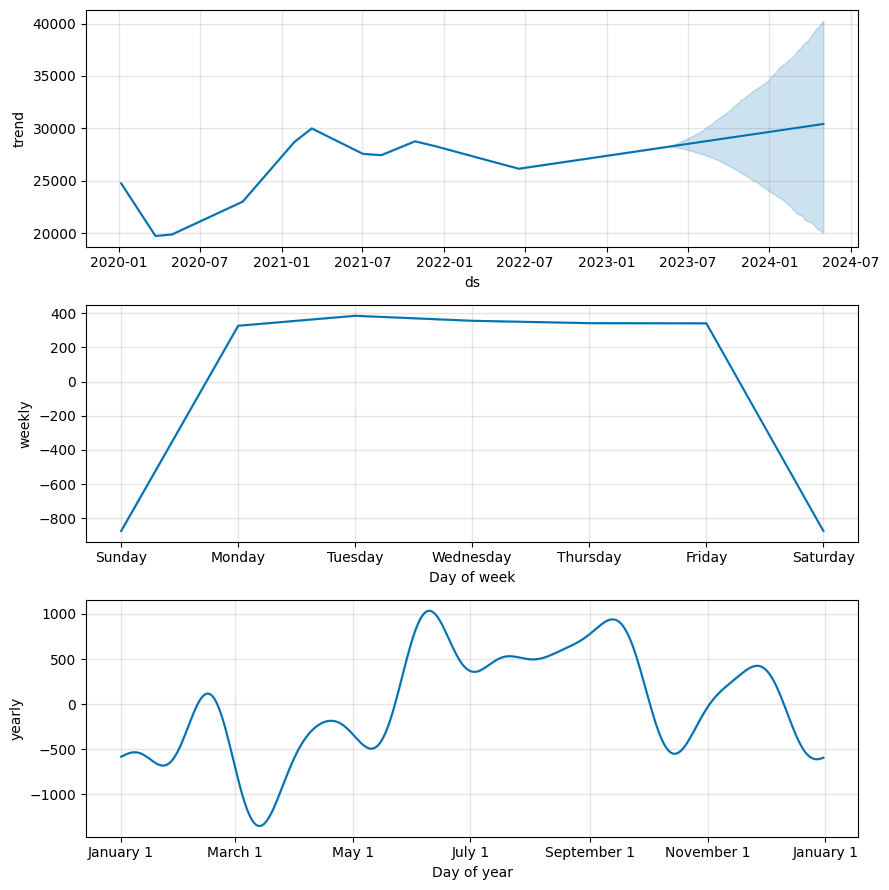

In [12]:
fig2 = m.plot_components(forecast)

### historical plot

In [32]:
df_nikkei = df.set_index('DATE')[['NIKKEI225']]
df_nikkei.loc[:, 'ratio']= df_nikkei.loc[:,'NIKKEI225']/df_nikkei.loc[df_nikkei.index[0], 'NIKKEI225']
df_nikkei

,NIKKEI225,ratio
DATE,,
2020-01-06,23204.86,1.000000
2020-01-07,23575.72,1.015982
2020-01-08,23204.76,0.999996
2020-01-09,23739.87,1.023056
2020-01-10,23850.57,1.027826
...,...,...
2023-04-26,28416.47,1.224591
2023-04-27,28457.68,1.226367
2023-04-28,28856.44,1.243552


In [31]:
df_dow = df.set_index('DATE')[['DJIA']]
df_dow.loc[:, 'ratio']= df_dow.loc[:,'DJIA']/df_dow.loc[df_dow.index[0], 'DJIA']
df_dow

,DJIA,ratio
DATE,,
2020-01-06,28703.38,1.000000
2020-01-07,28583.68,0.995830
2020-01-08,28745.09,1.001453
2020-01-09,28956.90,1.008832
2020-01-10,28823.77,1.004194
...,...,...
2023-04-26,33301.87,1.160207
2023-04-27,33826.16,1.178473
2023-04-28,34098.16,1.187949


In [41]:
df_nasdaq100 = pdr.DataReader('NASDAQ100', 'fred', '2020/1/1', end_date)
df_nasdaq100 = df_nasdaq100.dropna()
df_nasdaq100

,NASDAQ100
DATE,
2020-01-02,8872.219
2020-01-03,8793.902
2020-01-06,8848.516
2020-01-07,8846.449
2020-01-08,8912.371
...,...
2023-04-25,12725.110
2023-04-26,12806.480
2023-04-27,13160.030


In [42]:
df_nasdaq100.loc[:, 'ratio']= df_nasdaq100.loc[:,'NASDAQ100']/df_nasdaq100.loc[df_nasdaq100.index[0],'NASDAQ100']
df_nasdaq100

,NASDAQ100,ratio
DATE,,
2020-01-02,8872.219,1.000000
2020-01-03,8793.902,0.991173
2020-01-06,8848.516,0.997328
2020-01-07,8846.449,0.997095
2020-01-08,8912.371,1.004526
...,...,...
2023-04-25,12725.110,1.434265
2023-04-26,12806.480,1.443436
2023-04-27,13160.030,1.483285


In [43]:
df_emerging = pdr.DataReader('BAMLEMCBPITRIV', 'fred', '2020/1/1', end_date)
df_emerging = df_emerging.dropna()
df_emerging

,BAMLEMCBPITRIV
DATE,
2020-01-02,438.45
2020-01-03,439.54
2020-01-06,440.01
2020-01-07,440.09
2020-01-08,440.14
...,...
2023-04-26,406.88
2023-04-27,406.20
2023-04-28,406.99


In [44]:
df_emerging.loc[:, 'ratio']= df_emerging.loc[:,'BAMLEMCBPITRIV']/df_emerging.loc[df_emerging.index[0],'BAMLEMCBPITRIV']
df_emerging

,BAMLEMCBPITRIV,ratio
DATE,,
2020-01-02,438.45,1.000000
2020-01-03,439.54,1.002486
2020-01-06,440.01,1.003558
2020-01-07,440.09,1.003740
2020-01-08,440.14,1.003854
...,...,...
2023-04-26,406.88,0.927996
2023-04-27,406.20,0.926445
2023-04-28,406.99,0.928247


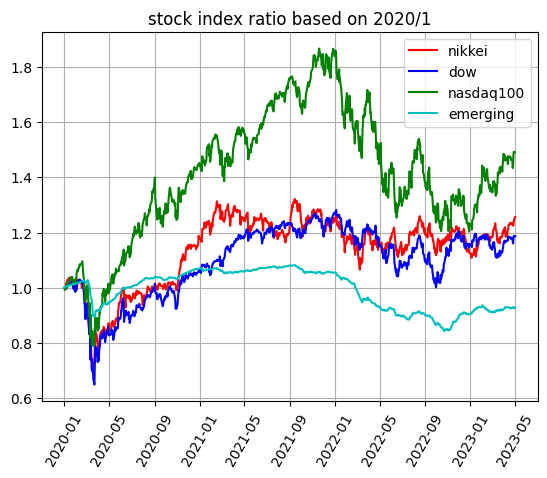

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure()
plt.plot(df_nikkei['ratio'], label='nikkei', color='r')
plt.plot(df_dow['ratio'], label='dow', color='b')
plt.plot(df_nasdaq100['ratio'], label='nasdaq100', color='g')
plt.plot(df_emerging['ratio'], label='emerging', color='c')

plt.xticks(rotation=60)
plt.legend()
plt.grid()
plt.title('stock index ratio based on 2020/1')
plt.show()

### ipywidgets test

In [ ]:
!pip3 install plotly

In [38]:
%matplotlib inline
import plotly.graph_objects as go
from ipywidgets import widgets

month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])
g = go.FigureWidget()

from IPython.display import display
display(widgets.VBox([container, g]))

In [39]:
from ipywidgets import interact
def f(x, a, b):
    return a * x + b
display(interact(f, x=(-10,10, 1), a=(-10,10, 1), b=(-10,10, 1)))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='a'…

<function __main__.f(x, a, b)>